import packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import downloaded IT Salary Survey

In [3]:
df2019 = pd.read_csv("T Salary Survey EU 2019.csv")
df2019

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
987,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
988,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
989,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


check the total number of rows and columns

In [4]:
df2019.shape

(991, 23)

check for missing values

In [6]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

get summary statistics of the data

In [7]:
df2019.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,882.000000,991.000000,990.000000,530.000000,203.000000,603.000000,257.000000,139.000000,931.000000,639.000000,0.0
mean,32.416100,8.529768,72562.212121,7857.169811,18263.119803,65803.895522,8144.000000,8204.476331,27.924812,6.462050,NaN
std,5.262496,5.036320,23947.379182,10320.628344,61012.387773,20554.017614,15067.876701,45224.397374,4.482911,15.384601,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,300.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.100000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80000.000000,10000.000000,20000.000000,75000.000000,9000.000000,3000.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,200000.000000,150000.000000,520000.000000,100.000000,365.000000,NaN


check employees gender composition

In [8]:
Gender_count = df2019["Gender"].value_counts()
Gender_count

Male      838
Female    153
Name: Gender, dtype: int64

get average salary of each gender

In [11]:
Gender_avg_salary = df2019.groupby('Gender')[
    "Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country"].mean()
Gender_avg_salary

Gender
Female    60366.483516
Male      66770.310547
Name: Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country, dtype: float64

check for correlations in the dataset

In [12]:
df2019.corr()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
Age,1.000000,0.647780,0.242880,0.094084,-0.077303,0.309817,0.068533,-0.094412,0.012425,-0.037729,NaN
Years of experience,0.647780,1.000000,0.396007,0.180374,0.014383,0.443655,0.113015,0.004372,-0.033416,0.015936,NaN
Yearly brutto salary (without bonus and stocks),0.242880,0.396007,1.000000,0.536173,-0.010463,0.901815,0.210744,-0.074903,0.043085,0.046235,NaN
Yearly bonus,0.094084,0.180374,0.536173,1.000000,0.596118,0.366834,0.524312,0.534584,0.071577,0.044403,NaN
Yearly stocks,-0.077303,0.014383,-0.010463,0.596118,1.000000,-0.066125,0.484286,0.989956,-0.445448,-0.031569,NaN
Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,0.309817,0.443655,0.901815,0.366834,-0.066125,1.000000,0.357509,-0.057892,0.011583,-0.006163,NaN
Yearly bonus one year ago. Only answer if staying in same country,0.068533,0.113015,0.210744,0.524312,0.484286,0.357509,1.000000,0.527784,-0.040756,0.029626,NaN
Yearly stocks one year ago. Only answer if staying in same country,-0.094412,0.004372,-0.074903,0.534584,0.989956,-0.057892,0.527784,1.000000,-0.478783,-0.029338,NaN
Number of vacation days,0.012425,-0.033416,0.043085,0.071577,-0.445448,0.011583,-0.040756,-0.478783,1.000000,0.013422,NaN
Number of home office days per month,-0.037729,0.015936,0.046235,0.044403,-0.031569,-0.006163,0.029626,-0.029338,0.013422,1.000000,NaN


In [13]:
corr_matrix = df2019.corr()
corr_matrix

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
Age,1.000000,0.647780,0.242880,0.094084,-0.077303,0.309817,0.068533,-0.094412,0.012425,-0.037729,NaN
Years of experience,0.647780,1.000000,0.396007,0.180374,0.014383,0.443655,0.113015,0.004372,-0.033416,0.015936,NaN
Yearly brutto salary (without bonus and stocks),0.242880,0.396007,1.000000,0.536173,-0.010463,0.901815,0.210744,-0.074903,0.043085,0.046235,NaN
Yearly bonus,0.094084,0.180374,0.536173,1.000000,0.596118,0.366834,0.524312,0.534584,0.071577,0.044403,NaN
Yearly stocks,-0.077303,0.014383,-0.010463,0.596118,1.000000,-0.066125,0.484286,0.989956,-0.445448,-0.031569,NaN
Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,0.309817,0.443655,0.901815,0.366834,-0.066125,1.000000,0.357509,-0.057892,0.011583,-0.006163,NaN
Yearly bonus one year ago. Only answer if staying in same country,0.068533,0.113015,0.210744,0.524312,0.484286,0.357509,1.000000,0.527784,-0.040756,0.029626,NaN
Yearly stocks one year ago. Only answer if staying in same country,-0.094412,0.004372,-0.074903,0.534584,0.989956,-0.057892,0.527784,1.000000,-0.478783,-0.029338,NaN
Number of vacation days,0.012425,-0.033416,0.043085,0.071577,-0.445448,0.011583,-0.040756,-0.478783,1.000000,0.013422,NaN
Number of home office days per month,-0.037729,0.015936,0.046235,0.044403,-0.031569,-0.006163,0.029626,-0.029338,0.013422,1.000000,NaN


visualize the correlations on a heatmap

<AxesSubplot:>

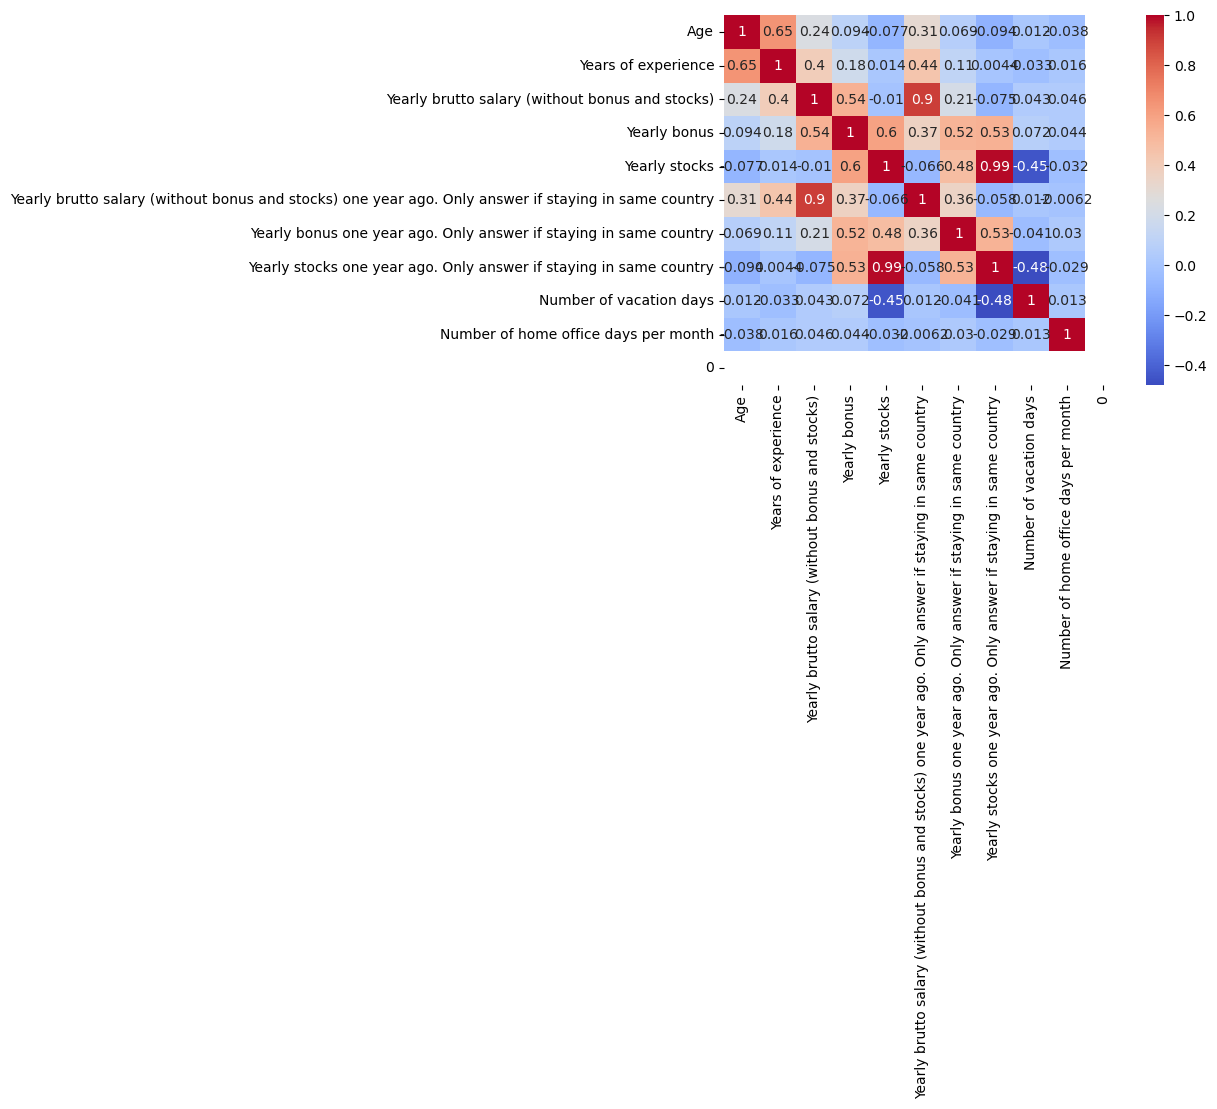

In [14]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='Yearly bonus'>

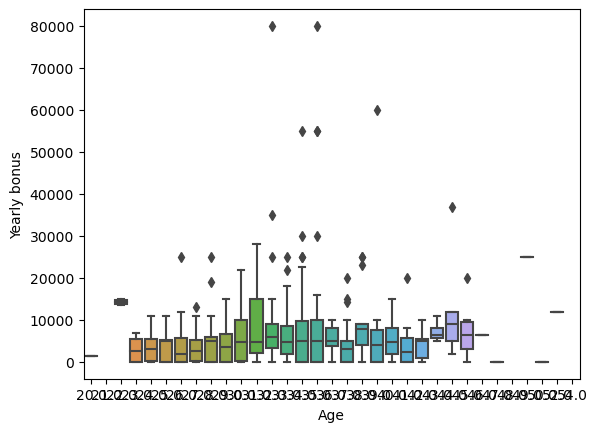

In [15]:
sns.boxplot(x='Age', y='Yearly bonus', data=df2019)

<AxesSubplot:xlabel='Age', ylabel='Yearly stocks'>

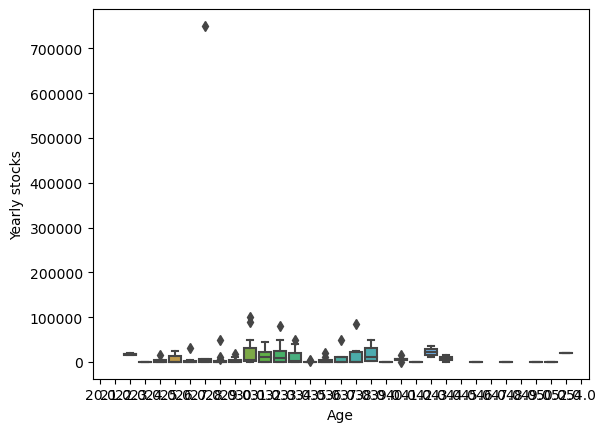

In [17]:
sns.boxplot(x='Age', y='Yearly stocks', data=df2019)